Student Habits and Academic Performance - Data Preprocessing section



**Libraries Used:**


Pandas


NumPy





Scikit-learn



Seaborn




Matplotlib

Original shape: (1000, 16)

Data types:
 student_id                        object
age                                int64
gender                            object
study_hours_per_day              float64
social_media_hours               float64
netflix_hours                    float64
part_time_job                     object
attendance_percentage            float64
sleep_hours                      float64
diet_quality                      object
exercise_frequency                 int64
parental_education_level          object
internet_quality                  object
mental_health_rating               int64
extracurricular_participation     object
exam_score                       float64
dtype: object

Missing values:
 student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percenta

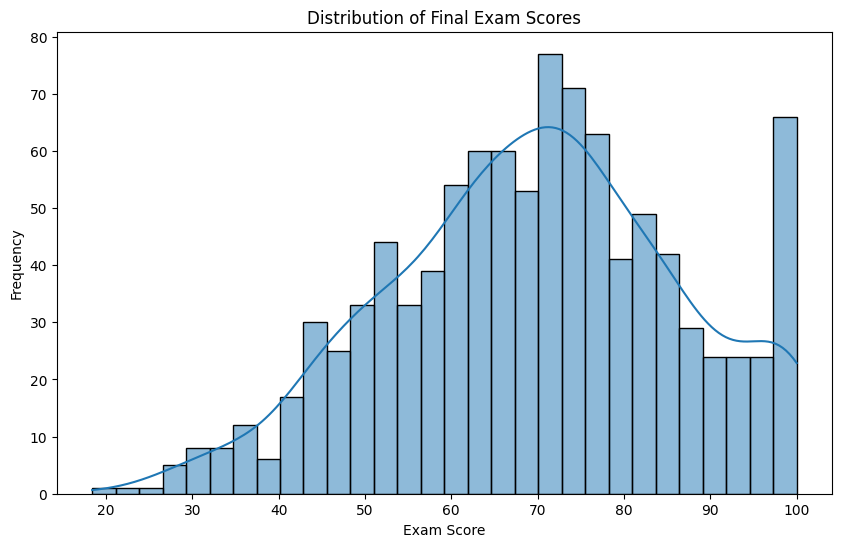

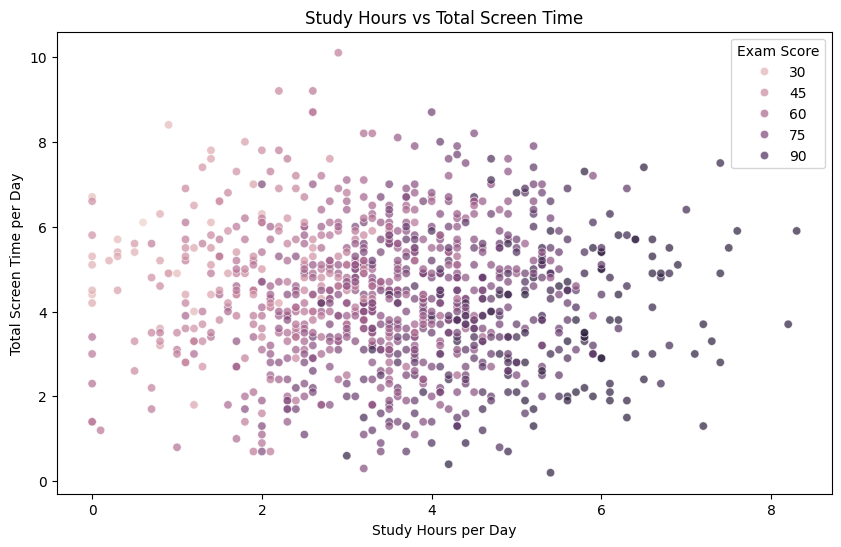

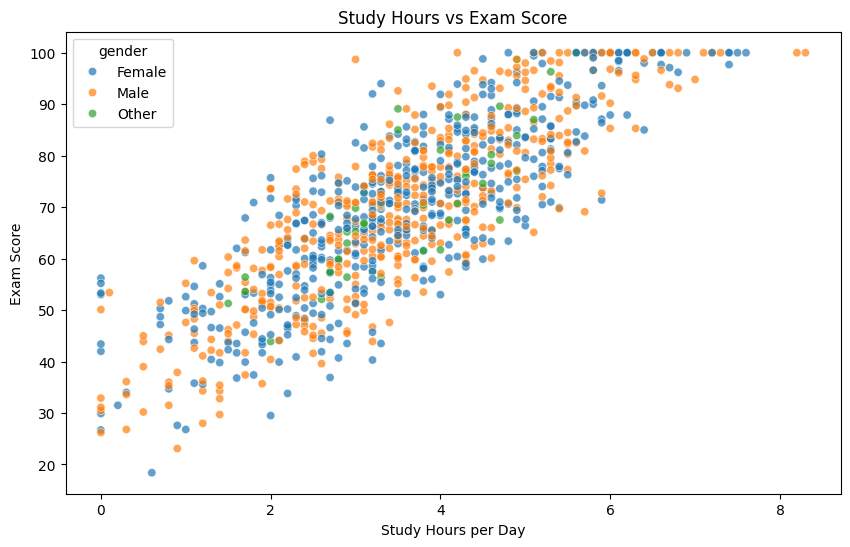

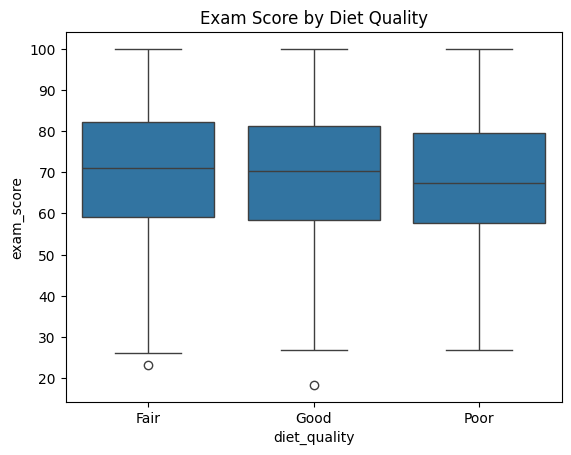

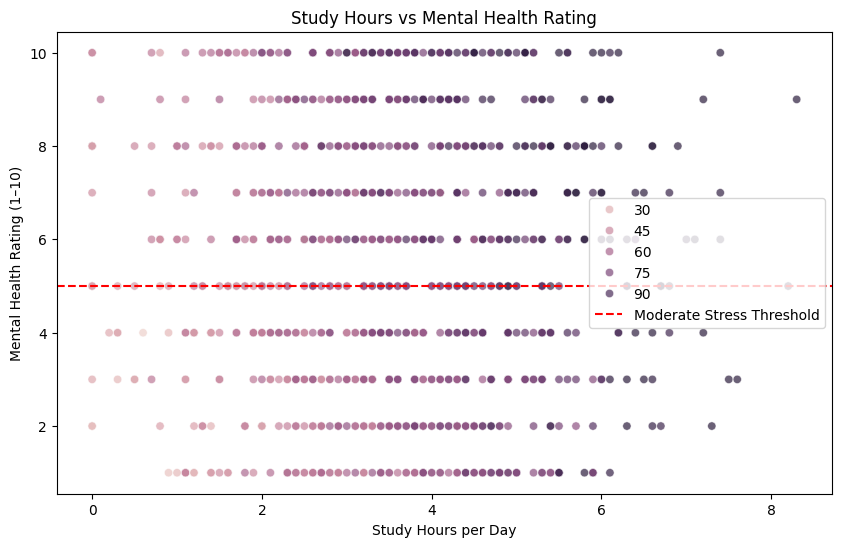

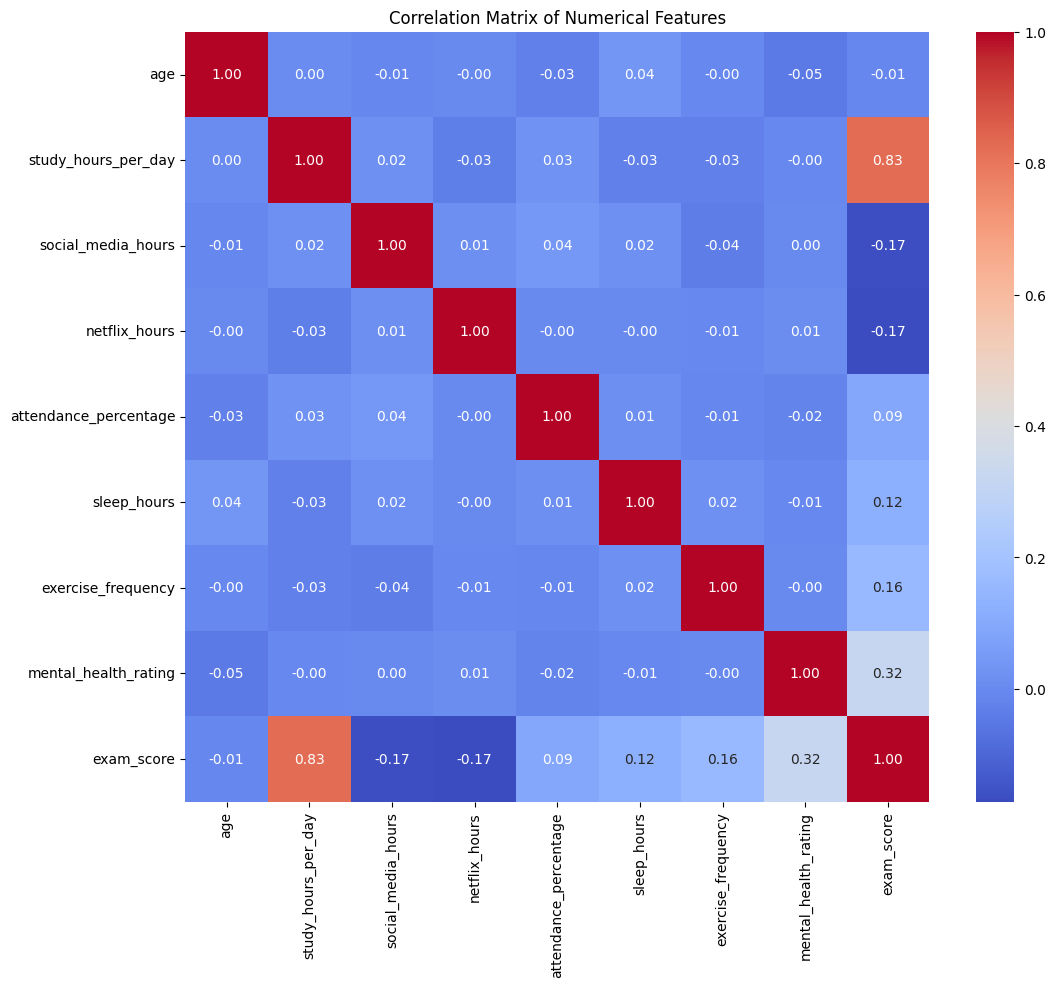

diet_quality_Good
False    0.600873
True     0.596065
Name: exam_score, dtype: float64


/tmp/ipython-input-76-2290452646.py:93: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols] = df[binary_cols].replace({'No': 0, 'Yes': 1})


,age,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,extracurricular_participation,...,internet_quality_Good,internet_quality_Poor,parental_education_level_High School,parental_education_level_Master,total_screen_time,lifestyle_index,study_category,behavior_cluster,PC1,PC2
0,1.084551,-2.427520,-1.119948,-0.671029,0,0.092026,1.249227,1.461166,0.900186,1,...,False,False,False,True,-1.790977,1.203527,NaN,1,-2.346401,-2.497657
1,-0.215870,2.293751,0.255487,0.449921,0,1.403312,-1.526470,1.461166,0.900186,0,...,False,False,True,False,0.705409,0.278294,Moderate,3,1.037435,2.244840
2,0.217604,-1.469581,0.513381,-0.484204,0,1.136790,1.249227,-1.008689,-1.559339,0,...,False,True,True,False,0.029178,-0.439600,NaN,0,-0.072943,-1.681900
3,1.084551,-1.743278,1.201099,-0.764441,0,-1.400495,2.228885,0.473224,-1.559339,1,...,True,False,False,True,0.436658,0.380923,NaN,0,0.280554,-2.864446
4,-0.649344,0.993691,1.630923,-1.231504,0,0.721017,-1.281556,-0.020747,-1.559339,0,...,True,False,False,True,0.399419,-0.953881,Low,2,0.597871,1.869475


In [76]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/sample_data/student_habits_performance.csv')
# Display basic info
print(f"Original shape: {df.shape}")
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())

#Exploratory Data Analysis (EDA)

# Histogram of exam scores
plt.figure(figsize=(10,6))
sns.histplot(df['exam_score'], bins=30, kde=True)
plt.title('Distribution of Final Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.show()
#Scatter plot Study Hours vs Total Screen Time
plt.figure(figsize=(10,6))
sns.scatterplot(x='study_hours_per_day', y=df['social_media_hours'] + df['netflix_hours'], hue='exam_score', data=df, alpha=0.7)
plt.title('Study Hours vs Total Screen Time')
plt.xlabel('Study Hours per Day')
plt.ylabel('Total Screen Time per Day')
plt.legend(title='Exam Score')
plt.show()
#Scatter plot: Study hours vs. Exam score
plt.figure(figsize=(10,6))
sns.scatterplot(x='study_hours_per_day', y='exam_score',hue="gender", data=df, alpha=0.7)
plt.title('Study Hours vs Exam Score')
plt.xlabel('Study Hours per Day')
plt.ylabel('Exam Score')
plt.show()
# Boxplot of exam scores by diet quality
sns.boxplot(data=df, x="diet_quality", y="exam_score").set_title("Exam Score by Diet Quality")
# Scatter: Mental health rating vs. Exam score
plt.figure(figsize=(10,6))
sns.scatterplot(x='study_hours_per_day', y='mental_health_rating', hue='exam_score', data=df, alpha=0.7)
plt.axhline(y=5, color='r', linestyle='--', label='Moderate Stress Threshold')
plt.title('Study Hours vs Mental Health Rating')
plt.xlabel('Study Hours per Day')
plt.ylabel('Mental Health Rating (1–10)')
plt.legend()
plt.show()
# Correlation heatmap
plt.figure(figsize=(12,10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# -------------------------------
#  Data Cleaning
# -------------------------------
# Handle Missing Values
df['parental_education_level'] = df['parental_education_level'].fillna(df['parental_education_level'].mode()[0])
#drop unique ID
df.drop(columns=['student_id'], inplace=True)

#Outlier Detection & Treatment using IQR method
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

numerical_cols = ['study_hours_per_day', 'social_media_hours', 'netflix_hours',
                  'attendance_percentage', 'sleep_hours', 'exercise_frequency',
                  'mental_health_rating', 'exam_score']
for col in numerical_cols:
    df = cap_outliers(df, col)

# -------------------------------
# Encoding Categorical Variables
# -------------------------------
#One-Hot Encoding for Nominal Categories

#Encode binary categorical variables (Yes/No) to 0 and 1
binary_cols = ['part_time_job', 'extracurricular_participation']
df[binary_cols] = df[binary_cols].replace({'No': 0, 'Yes': 1})


df = pd.get_dummies(df, columns=['gender', 'diet_quality', 'internet_quality', 'parental_education_level'], drop_first=True)

# Ordinal encoding for ordered categories (mental_health_rating)

ordinal_encoder = OrdinalEncoder(categories=[np.arange(1, 11)])
df['mental_health_rating'] = ordinal_encoder.fit_transform(df[['mental_health_rating']])

# -------------------------------
# Feature Scaling
# -------------------------------
# Standardize features with normal-like distribution
standard_scaler = StandardScaler()
std_cols = ['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'attendance_percentage', 'sleep_hours', 'exercise_frequency', 'mental_health_rating']
df[std_cols] = standard_scaler.fit_transform(df[std_cols])

# Normalize exam score (range [0,1])
minmax_scaler = MinMaxScaler()
df['exam_score'] = minmax_scaler.fit_transform(df[['exam_score']])

# -------------------------------
# Feature Engineering
# -------------------------------
#Create Composite Features:
# Total screen time
df['total_screen_time'] = df['social_media_hours'] + df['netflix_hours']

# Lifestyle index (average of wellness-related normalized features)
wellness_features = ['sleep_hours', 'mental_health_rating', 'exercise_frequency']
df['lifestyle_index'] = df[wellness_features].mean(axis=1)

#Binning Continuous Variables
# Bin study hours
bins = [0, 2, 4, 6, 8]
labels = ['Low', 'Moderate', 'High', 'Very High']
df['study_category'] = pd.cut(df['study_hours_per_day'], bins=bins, labels=labels)

# Group by diet quality and get average exam score
grouped = df.groupby('diet_quality_Good')['exam_score'].mean()
print(grouped)

# Cluster students based on lifestyle behaviors
kmeans = KMeans(n_clusters=4, random_state=42)
df['behavior_cluster'] = kmeans.fit_predict(df[['study_hours_per_day', 'total_screen_time', 'sleep_hours', 'lifestyle_index']])

# -------------------------------
# Dimensionality Reduction
# -------------------------------
pca = PCA(n_components=2)
numeric_features = df.select_dtypes(include=np.number).drop(['exam_score'], axis=1)
pca_features = pca.fit_transform(numeric_features)
pca_df = pd.DataFrame(pca_features, columns=["PC1", "PC2"])
# Combine back with original dataframe
df = pd.concat([df.reset_index(drop=True), pca_df.reset_index(drop=True)], axis=1)

# Define features and target variable
X = df.drop('exam_score', axis=1)  # Exclude the target
y = df['exam_score']

#Select Important Features
important_features = [
    'study_hours_per_day',
    'total_screen_time',
    'sleep_hours',
    'attendance_percentage',
    'lifestyle_index',
    'mental_health_rating',
    'exercise_frequency'
]
X = df[important_features]
y = df['exam_score']

# -------------------------------
# Split into training and test sets
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

df.head()




Model Training & Evaluation Section

In [94]:
##---Linear Regression---##

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr_model = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


print("Linear Regression R²:", r2_score(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))





Linear Regression R²: 0.9007151665796584
RMSE: 0.06614389611347295
MAE: 0.05379084684080631


In [93]:
##---Random Forest Regressor---##
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest R²:", r2_score(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))

Random Forest R²: 0.8794622950709597
RMSE: 0.07288023698380633
MAE: 0.059372757255936666


In [95]:
##---XGBoost Regressor---##
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1,max_depth=3, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost R²:", r2_score(y_test, y_pred_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))

XGBoost R²: 0.880517538114625
RMSE: 0.07256052199307998
MAE: 0.059841422341213535


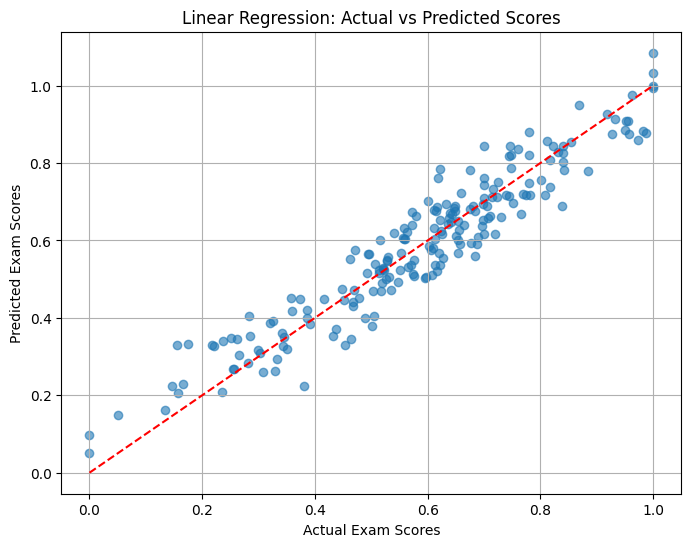

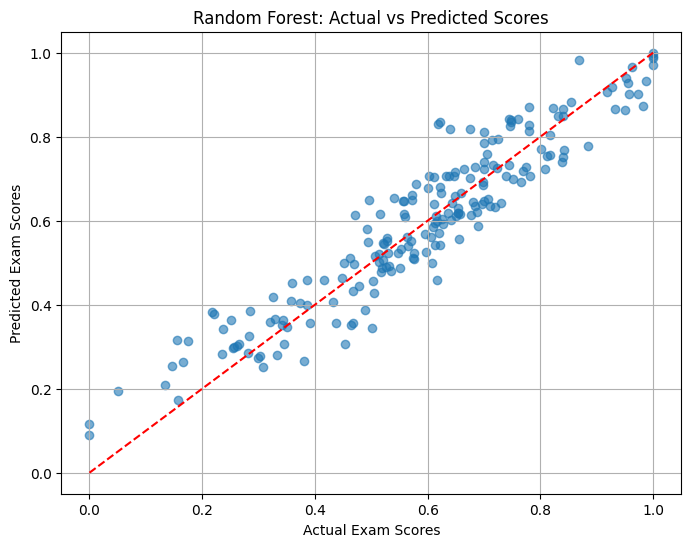

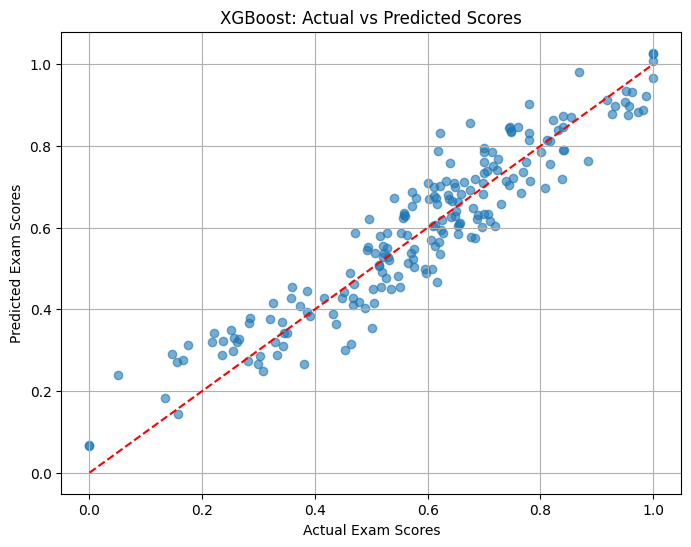

In [99]:
##---Visualize Predictions vs Actuals---##

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Exam Scores')
plt.ylabel('Predicted Exam Scores')
plt.title('Linear Regression: Actual vs Predicted Scores')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Exam Scores')
plt.ylabel('Predicted Exam Scores')
plt.title('Random Forest: Actual vs Predicted Scores')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Exam Scores')
plt.ylabel('Predicted Exam Scores')
plt.title('XGBoost: Actual vs Predicted Scores')
plt.grid(True)
plt.show()

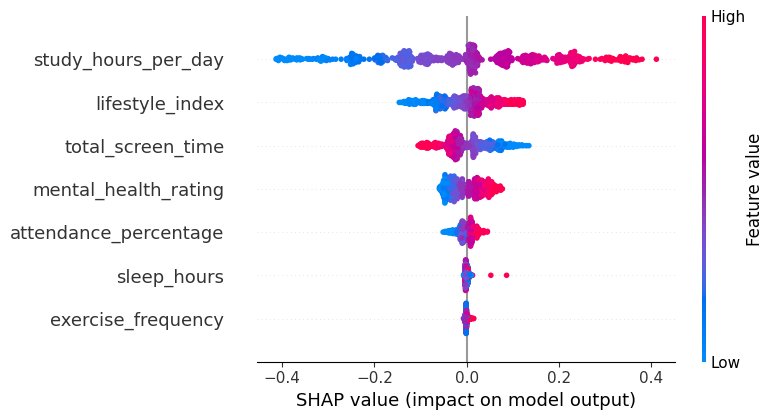

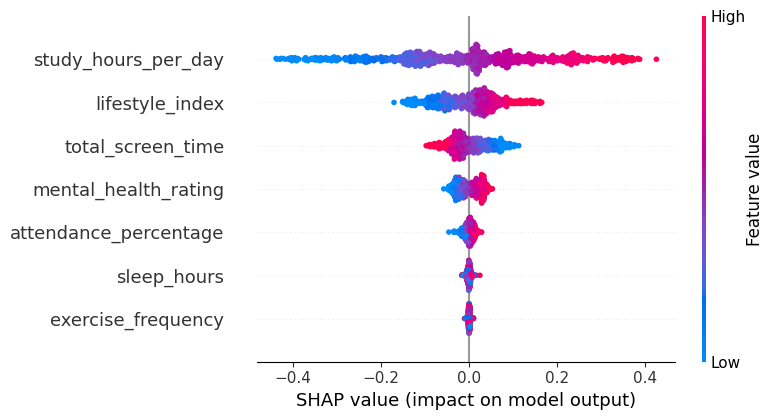

In [62]:
##---Feature Importance--##
import shap

explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_train)

shap.summary_plot(shap_values, X_train, feature_names=X.columns)

import shap

explainer = shap.Explainer(rf_model)
shap_values = explainer(X_train)

shap.summary_plot(shap_values, X_train, feature_names=X.columns)

Text(0.5, 1.0, 'XGBoost Feature Importance')

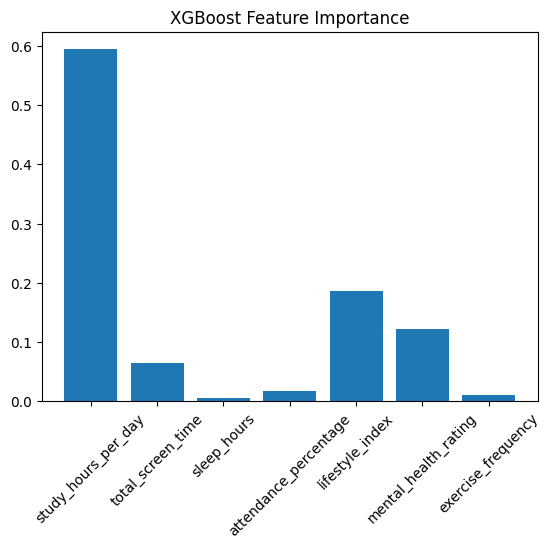

In [101]:
#Feature Importance

plt.bar(X.columns, xgb_model.feature_importances_)
plt.xticks(rotation=45)
plt.title("XGBoost Feature Importance")



In [103]:
#---Hyperparameter Tuning---#

from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1]}
grid_search = GridSearchCV(XGBRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5, 7]})